In [1]:
import numpy as np
import pandas as pd

In [28]:
df=pd.read_csv('../data/processed/data.csv')

In [29]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_year,dropoff_month,dropoff_day,dropoff_day_of_week,pickup_year,pickup_month,pickup_day,pickup_day_of_week,distance_in_km
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,0,2016,3,14,0,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,6,2016,6,12,6,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,1,2016,1,19,1,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,2,2016,4,6,2,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,5,2016,3,26,5,1.188588


In [30]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'dropoff_year', 'dropoff_month', 'dropoff_day', 'dropoff_day_of_week',
       'pickup_year', 'pickup_month', 'pickup_day', 'pickup_day_of_week',
       'distance_in_km'],
      dtype='object')

In [31]:
# keeping only pickup column because both pickup and dropoff values (time related) are same and year is same for all so droping it too
df.drop(columns=['pickup_datetime','dropoff_datetime','dropoff_year','dropoff_month','dropoff_day','dropoff_day_of_week','pickup_year'],axis=1,inplace=True)

In [32]:
y=df['trip_duration']
df.drop(columns=['trip_duration'],axis=1,inplace=True)

In [33]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,pickup_day,pickup_day_of_week,distance_in_km
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,3,14,0,1.498521
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,6,12,6,1.805507
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,1,19,1,6.385098
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,4,6,2,1.485498
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,3,26,5,1.188588


## handling outliers and distribuition

<Axes: ylabel='Density'>

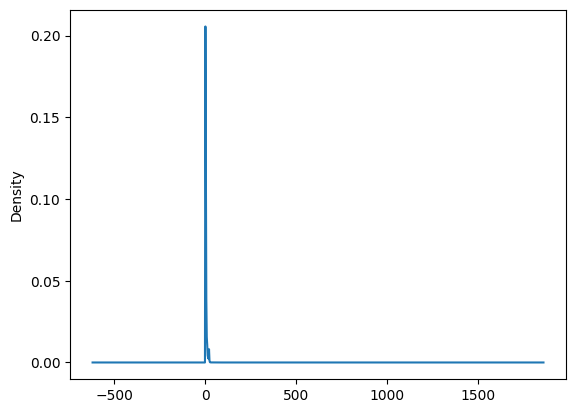

In [44]:
df['distance_in_km'].plot(kind='kde')

In [45]:
df['distance_in_km'].skew()

np.float64(32.630981004659645)

In [46]:
df['distance_in_km'].apply(np.log1p).skew()

np.float64(0.9052920723100593)

<Axes: ylabel='Density'>

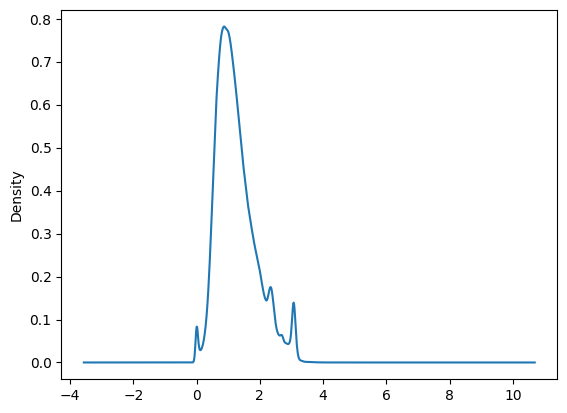

In [47]:
df['distance_in_km'].apply(np.log1p).plot(kind='kde')

In [53]:
from sklearn.preprocessing import PowerTransformer
pf=PowerTransformer()
new_dist=pf.fit_transform(df['distance_in_km'].values.reshape(df.shape[0],1))

In [54]:
pd.DataFrame(new_dist).skew()

0    0.04498
dtype: float64

<Axes: ylabel='Density'>

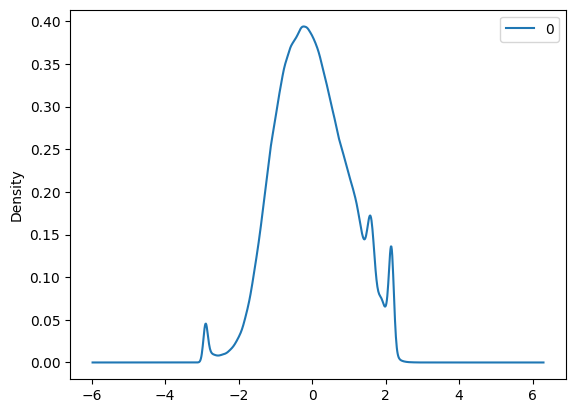

In [55]:
pd.DataFrame(new_dist).plot(kind='kde')

<Axes: >

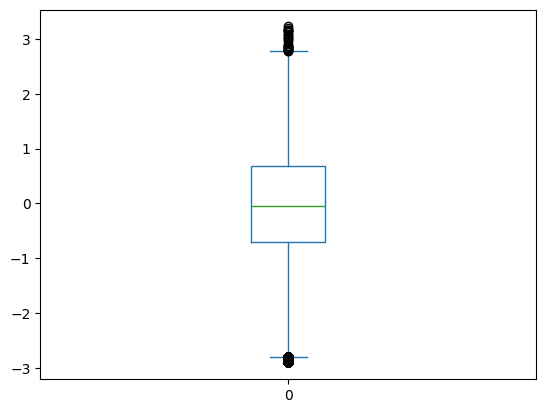

In [56]:
pd.DataFrame(new_dist).plot(kind='box')

In [57]:
new_dist=pd.DataFrame(new_dist,columns=['col'])
mean_=new_dist['col'].mean()
std_=new_dist['col'].std()

min_bound=mean_-3*std_
max_bound=mean_+3*std_

# outliers

new_dist[(new_dist['col']<min_bound) | (new_dist['col']>max_bound)]

,col
184925,3.229601
275644,3.080875
377068,3.083446
397526,3.153821
644165,3.046389
910072,3.160407
923793,3.157166
974378,3.202989
1013474,3.132091
1060807,3.016481


# Pipeline

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import PowerTransformer
pf=PowerTransformer()

# clm transformer transform column and append them to the begining of the tranformed array


clm_trans_cat=ColumnTransformer([
    ('onehot',OneHotEncoder(),[6])
],remainder='passthrough')

# try minmax scaler also in dvc ppl 
clm_trans_num=ColumnTransformer([
    ('std',StandardScaler(),[4,5,6,7]),
    ('pf',pf,[11,8,9,10]),
],remainder='passthrough')

# save ppl in dvc ppl
ppl=Pipeline(steps=[
    ('categorical',clm_trans_cat),
    ('numerical',clm_trans_num)
])

In [66]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,pickup_day,pickup_day_of_week,distance_in_km
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,3,14,0,1.498521
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,6,12,6,1.805507
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,1,19,1,6.385098
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,4,6,2,1.485498
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,3,26,5,1.188588


In [67]:
# save this ppl in dvc ppl
new_df=ppl.fit_transform(df)

In [68]:
new_df=pd.DataFrame(new_df)

In [81]:
new_df['target']=np.log1p(y)

In [82]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target
0,-0.122261,0.517494,0.124369,0.384575,-0.469637,-0.258581,-0.081501,-1.660887,1.0,0.0,2.0,1.0,6.122493
1,-0.097727,-0.375819,-0.368970,-0.575303,-0.238319,1.420895,-0.312670,1.432332,1.0,0.0,1.0,1.0,6.498282
2,-0.078143,0.395910,-0.451805,-1.162220,1.222197,-1.562319,0.460491,-1.034804,1.0,0.0,2.0,1.0,7.661527
3,-0.515558,-0.941274,-0.549976,-1.256071,-0.480411,0.327850,-1.082010,-0.479055,1.0,0.0,2.0,1.0,6.063785
4,0.006112,1.286091,0.006974,0.855957,-0.752234,-0.258581,1.156773,0.985448,1.0,0.0,2.0,1.0,6.077642


In [83]:
new_df.to_csv('../data/interim/transformed.csv',index=False)